In [7]:
import numpy as np
import matplotlib.pyplot as plt

1D - cellular automat,  8 ruznych sestaveni mrizky s sousedy, v dalsim case muze byt (1 nebo 0) od overene bunky - 2**8 = 256 ruznych pravidel

pr pravidlo 30: a[0, 0, 0, 1, 1, 1, 1, 0] -> a[8] = 0* 2^0, a[7] = 1*2^1, a[6] = 1*2^2, z_bin = sum(a[:]) = 30 = 00011110   

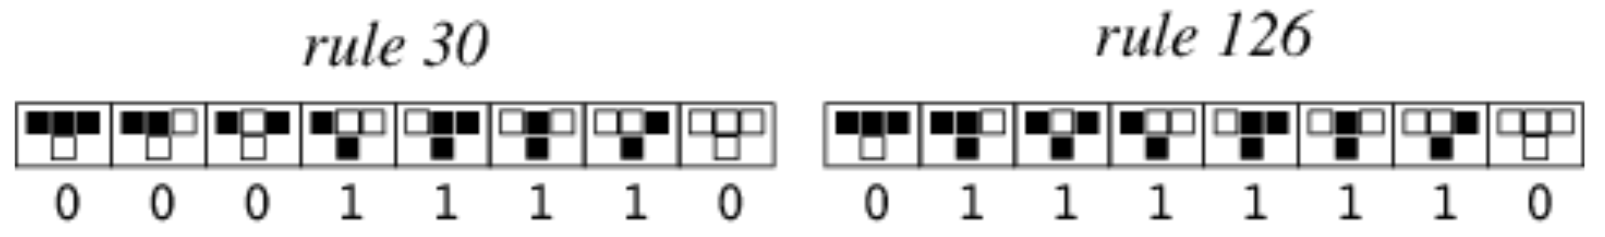

In [8]:
bin(30)

'0b11110'

In [9]:
print(f'{30:08b}')

00011110


jestli bunky aktualniho casu prepocitame na bin cisla, budeme mit 7...0, proto prestupujeme -idx

In [10]:
def hra(cislo_pravidla):
    pravidlo = f'{cislo_pravidla:08b}'
    pravidlo = [int(cislo) for cislo in pravidlo]

    pocet_casovych_kroku = 100
    sirka = 99
    pole = np.zeros((pocet_casovych_kroku,sirka), dtype = int)
    pocatecni_bunka = int(np.floor(sirka/2)) # ceil
    pole[0][pocatecni_bunka] = 1
    
    for i in range(0,  pocet_casovych_kroku-1):
        for j in range(1, sirka - 1):
            bin_cislo = ''.join(str(cislo) for cislo in pole[i, j-1:j+2])
            idx = int(bin_cislo, 2)
            pole[i+1, j] = pravidlo[-(idx+1)]
    
    return pole

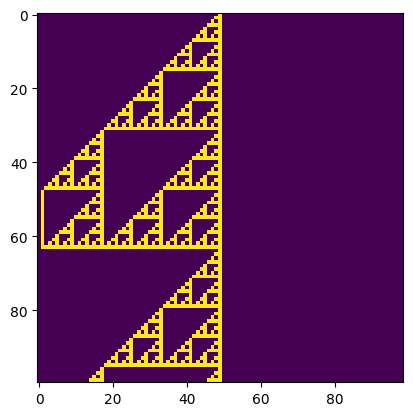

In [11]:
plt.imshow(hra(102))

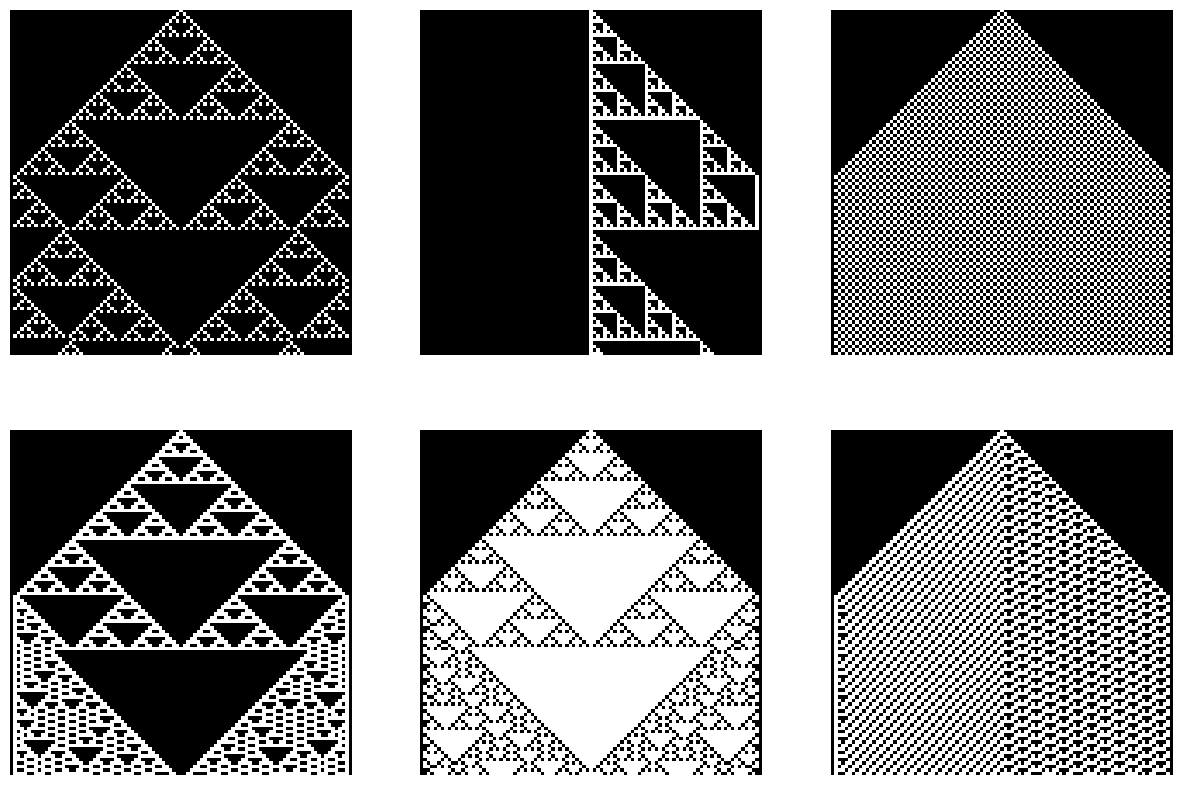

In [12]:
pravidla = [90, 60, 122, 126, 182, 62]
fig, axs = plt.subplots(2,3, figsize=(15, 10))
axs = axs.flatten() 
for ax, pravidlo in zip(axs, pravidla):
    ax.imshow(hra(pravidlo), cmap = 'gray')
    ax.axis('off')
    
plt.show()